# **Predicting Stock Price using LSTM model, PyTorch**

# Importing Neccessary *Libary*


In [ ]:
import numpy as np # Fundamental package for scientific computing with support for arrays and mathematical functions.
import random # provides functions for generating pseudo-random numbers.
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import seaborn as sns

from pandas import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
import sklearn # Machine learning library for classification, regression, clustering, etc.
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

import torch # Open-source machine learning library known for its dynamic computation graph as known as pytorch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torch.autograd import Variable


<ipython-input-1-fec6ca61fc82>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-1-fec6ca61fc82>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

# yfinance library to download historical market data for the Apple Inc. (AAPL) stock from January 1, 1980, to January 1, 2023. Also getting insight form the downloaded data.

In [ ]:
data = yf.download(['AAPL'], start='1980-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


# The data.describe() method is used to generate descriptive statistics of a DataFrame. When applied to a Pandas DataFrame, it provides a summary of statistical measures for each numerical column in the DataFrame. Here's what each statistic represents:

count: Number of non-null entries. in the dataframe in can be seen that all the columns are of euqal num of 10603 rows indicating that were no missing rows.

mean: Mean (average) of the values. it can be seen that each columns have sigthly different mean value.

std: Standard deviation, which measures the amount of variation or dispersion of a set of values. Each columns as a sightly diffrent standard deviation.

min: Minimum value in the column.
25%: 25th percentile or the first quartile.
50%: Median or the 50th percentile (second quartile).
75%: 75th percentile or the third quartile.
max: Maximum value in the column.
When you run data.describe(), you'll get a table with these statistics for each numerical column in your DataFrame, allowing you to quickly understand the distribution and central tendencies of the data.

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10603.000000,10603.000000,10603.000000,10603.000000,10603.000000,1.060300e+04
mean,16.469457,16.656493,16.283398,16.476383,15.718157,3.276672e+08
std,35.130398,35.555103,34.713782,35.149540,34.629580,3.378503e+08
min,0.049665,0.049665,0.049107,0.049107,0.038000,0.000000e+00
25%,0.287076,0.294643,0.280703,0.287143,0.236146,1.213800e+08
50%,0.486607,0.493304,0.477679,0.486049,0.400377,2.147040e+08
75%,16.128572,16.304107,15.961071,16.093215,13.835786,4.067392e+08
max,182.630005,182.940002,179.119995,182.009995,179.953873,7.421641e+09


# # The data.info() method is used to get a concise summary of the DataFrame, including information about the data types, non-null counts, and memory usage. It provides a quick overview of the structure of the DataFrame. Here's what each part of the output represents:**

The DataFrame has a DatetimeIndex with 10,603 entries.
There are six columns: 'Open,' 'High,' 'Low,' 'Close,' 'Adj Close,' and 'Volume.'
All columns have 11,098 non-null entries, indicating that there are no missing values.
The data types include float64 for numeric columns and int64 for the 'Volume' column.
This summary is helpful for quickly assessing the structure and completeness of your

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10603 entries, 1980-12-12 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10603 non-null  float64
 1   High       10603 non-null  float64
 2   Low        10603 non-null  float64
 3   Close      10603 non-null  float64
 4   Adj Close  10603 non-null  float64
 5   Volume     10603 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 579.9 KB


# The provided code seems to be aiming to create a plot of the stock price trendline for the AAPL stock, with different colors representing the opening, closing, high, and low prices

from the trend there as being a sharp price of appl stock price starting from year 2010 to 2024

<Figure size 1500x500 with 0 Axes>

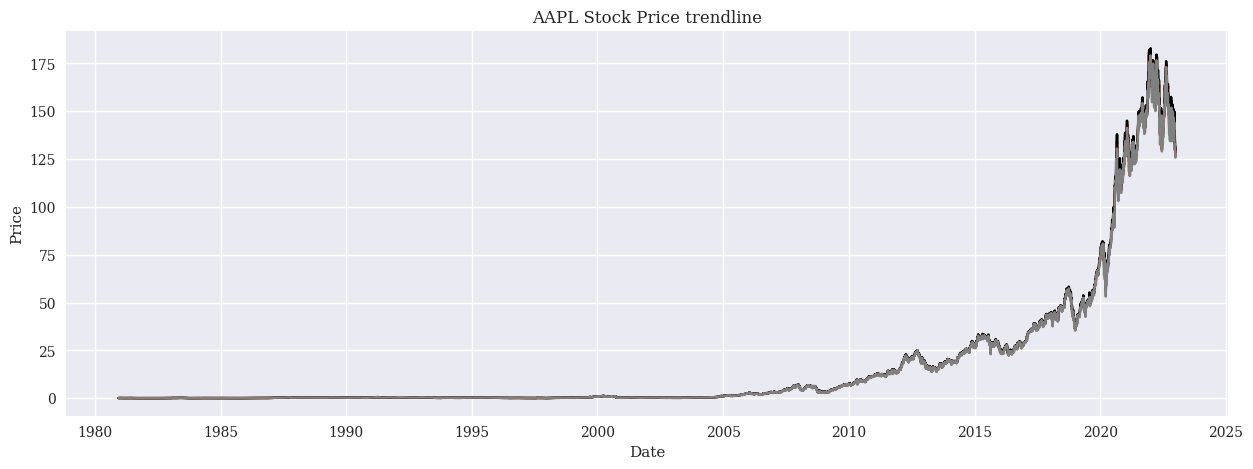

In [ ]:
plt.figure(figsize=(15, 5))


# Create the trendline
plt.figure(figsize=(15, 5))
plt.title('AAPL Stock Price trendline')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data['Open'], color='green')
plt.plot(data['Close'], color='red')
plt.plot(data['High'], color='black')
plt.plot(data['Low'], color='gray')
plt.legend(loc='best')

# Show the plot
plt.show()

#
The code you provided uses Plotly to create a candlestick chart for the AAPL stock's first 100 days.

form the obervation of the graph there as being a downward trend in the stock price starting from 29 dec 1980 to 11 mar 1981 before a change in trend 13 mar 1981 to may 6 1981.

In [ ]:
import plotly.graph_objects as go


plt.figure(figsize=(15, 5))

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'].head(100),
                                     high=data['High'].head(100),
                                     low=data['Low'].head(100),
                                     close=data['Close'].head(100))])

# Set layout properties
fig.update_layout(title='APPL stock Candlestick Chart for the first 100 days',
                  xaxis_title='Days',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the plot
fig.show()


<Figure size 1500x500 with 0 Axes>

# The code you provided uses Plotly to create a candlestick chart for the AAPL stock's last 100 days.

Form my obervation of the graph there as being a downward trend in the stock price from the last 100 days of the data.

In [ ]:
import plotly.graph_objects as go


plt.figure(figsize=(15, 5))

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'].tail(100),
                                     high=data['High'].tail(100),
                                     low=data['Low'].tail(100),
                                     close=data['Close'].tail(100))])

# Set layout properties
fig.update_layout(title='APPL stock Candlestick Chart for the last 100 days',
                  xaxis_title='Time [days]',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

<Figure size 1500x500 with 0 Axes>

#
This code uses Matplotlib to plot the volume of the stock data.

From the obsevered data it can be seen that in most days the the volume as been within the mean range except in some days that there were spikes in volume.

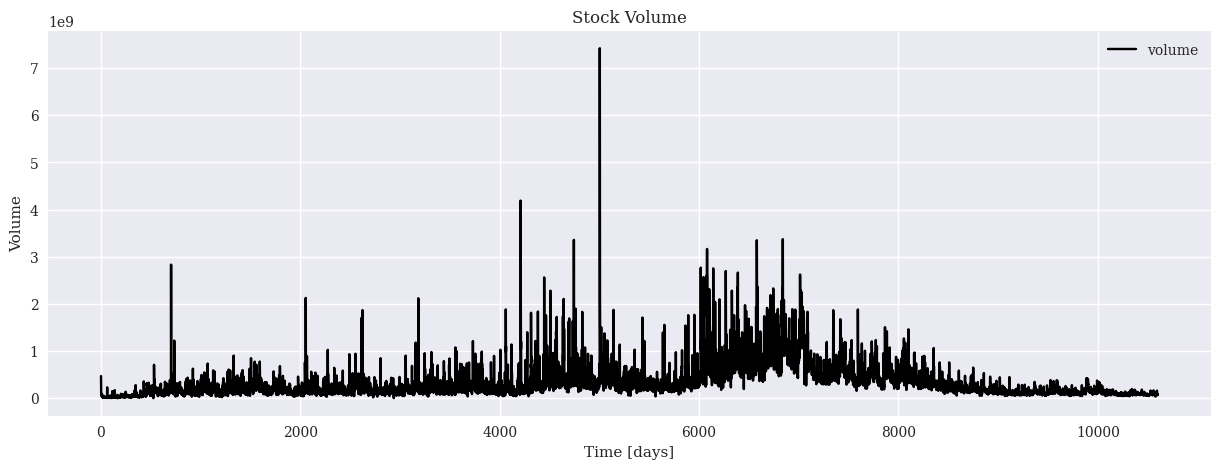

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(data.Volume.values, color='black', label='volume')
plt.title('Stock Volume')
plt.xlabel('Time [days]')
plt.ylabel('Volume')
plt.legend(loc='best')

# The next four codes uses Matplotlib to plot the opening, high, low and closing prices of the APPL stock price.

From the trend you can see a grdual rise in the stock price.

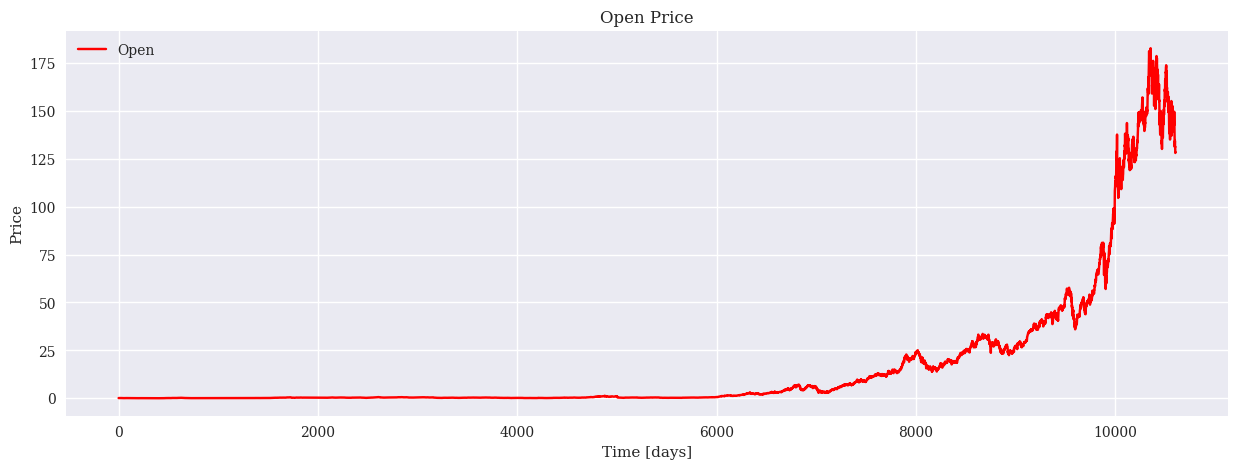

In [ ]:
plt.figure(figsize=(15, 5))


plt.plot(data.Open.values, color='red', label='Open')
plt.title('Open Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

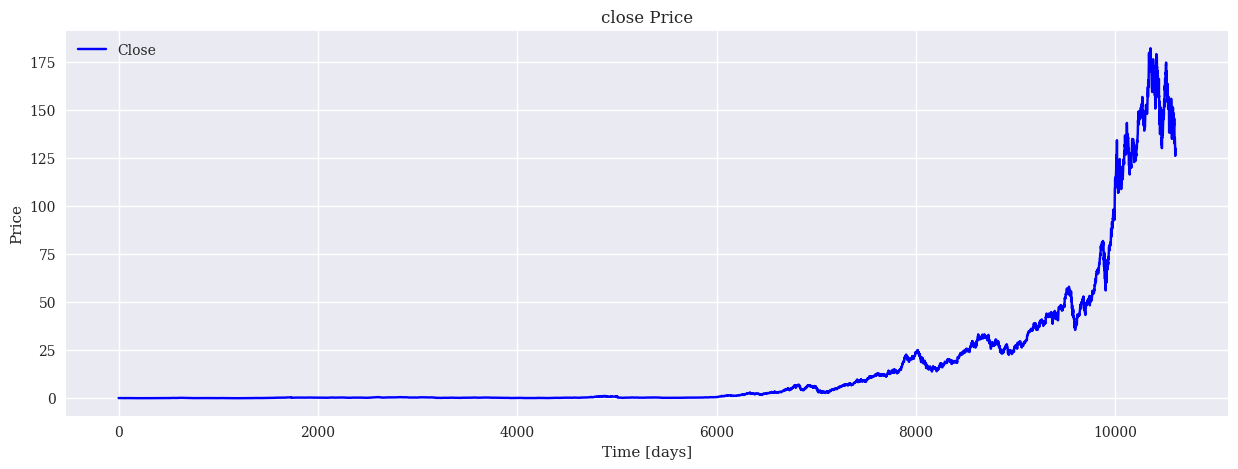

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(data.Close.values, color='blue', label='Close')
plt.title('close Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

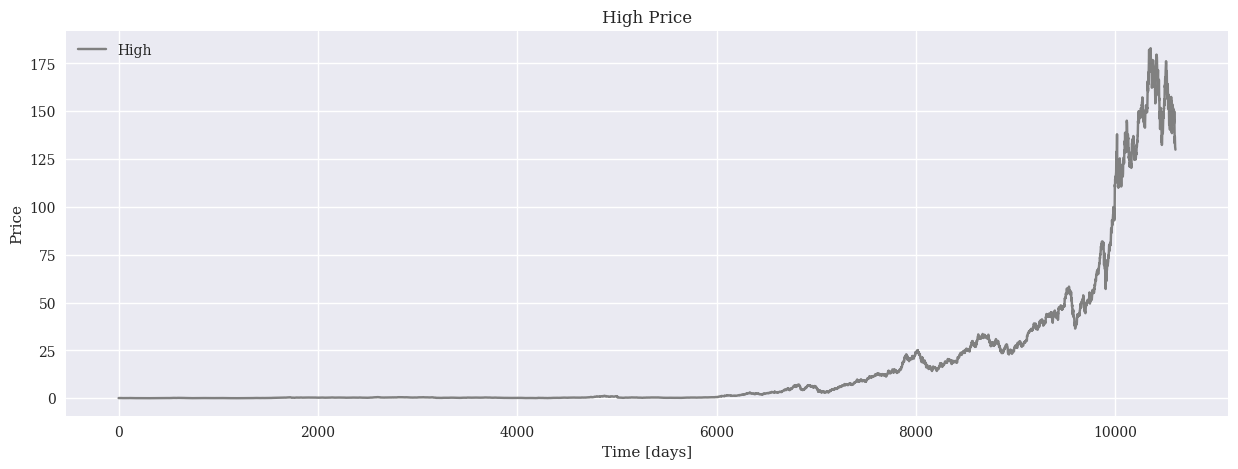

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(data.High.values, color='gray', label='High')
plt.title('High Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

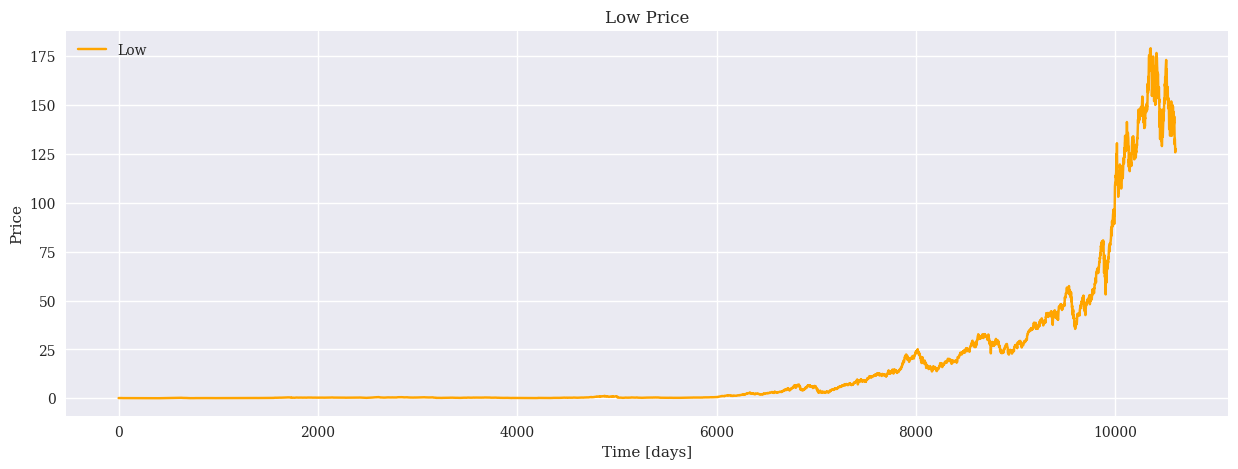

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(data.Low.values, color='orange', label='Low')
plt.title('Low Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

# This code calculates the daily percentage change for the close price of a stock and then plots the volatility using a 21-day rolling standard deviation.

From my observation of the diagram i notice Volatility turns to be more upaward little or no Volatility downward  and percentage of the Volatility rose up to more 12% in a day.

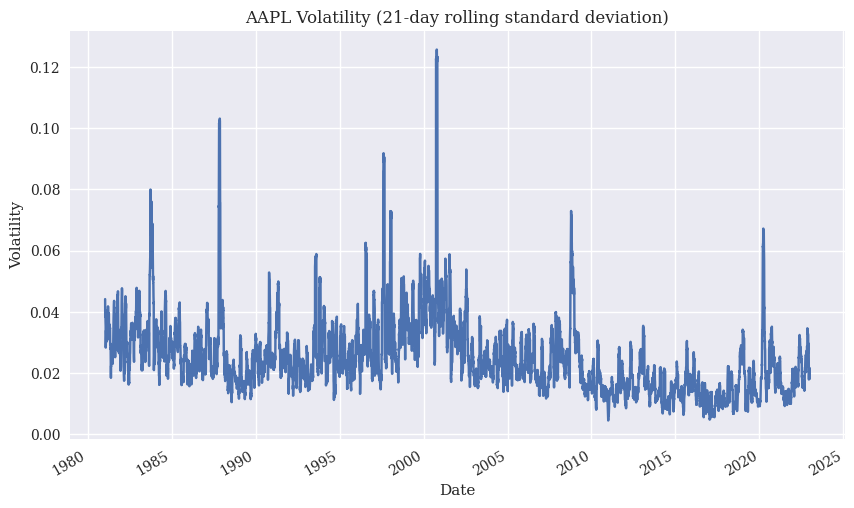

In [ ]:
# Calculate daily percentage change for close price
daily_returns = data['Close'].pct_change()

# Plot the volatility
plt.figure(figsize=(10, 6))
daily_returns.rolling(window=21).std().plot(title='AAPL Volatility (21-day rolling standard deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# The code data = data[['Close']] selects only the 'Close' column from the DataFrame 'data' and assigns it back to the variable 'data'. This operation essentially creates a new DataFrame containing only the 'Close' column.

For this analysis only the closing stock would be consider.


In [ ]:
data = data[['Close']]
data

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


#  This function checks if a CUDA-enabled GPU is available for use with PyTorch.

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# The code defines a function prepare_dataframe_for_lstm that prepares a DataFrame for training a Long Short-Term Memory (LSTM) model. The function creates lag features for the 'Close' prices, essentially shifting the 'Close' column backward in time to create features for the specified number of time steps.

what this code those is that it shift the Close price back to seven days and using each of the close price for the seven days as the features and and the actual close price as the target.

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    #df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1980-12-23,0.137835,0.132254,0.126116,0.118862,0.115513,0.112723,0.121652,0.128348
1980-12-24,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513,0.112723,0.121652
1980-12-26,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513,0.112723
1980-12-29,0.160714,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513
1980-12-30,0.156808,0.160714,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862
...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,132.229996,135.449997,132.300003,132.369995,134.509995,136.500000,143.210007
2022-12-27,130.029999,131.860001,132.229996,135.449997,132.300003,132.369995,134.509995,136.500000
2022-12-28,126.040001,130.029999,131.860001,132.229996,135.449997,132.300003,132.369995,134.509995


In [ ]:
# Converts the Pandas DataFrame shifted_df to a NumPy array.

shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[1.37834996e-01, 1.32254004e-01, 1.26115993e-01, ...,
        1.12723000e-01, 1.21652000e-01, 1.28347993e-01],
       [1.45089000e-01, 1.37834996e-01, 1.32254004e-01, ...,
        1.15512997e-01, 1.12723000e-01, 1.21652000e-01],
       [1.58482000e-01, 1.45089000e-01, 1.37834996e-01, ...,
        1.18862003e-01, 1.15512997e-01, 1.12723000e-01],
       ...,
       [1.26040001e+02, 1.30029999e+02, 1.31860001e+02, ...,
        1.32300003e+02, 1.32369995e+02, 1.34509995e+02],
       [1.29610001e+02, 1.26040001e+02, 1.30029999e+02, ...,
        1.35449997e+02, 1.32300003e+02, 1.32369995e+02],
       [1.29929993e+02, 1.29610001e+02, 1.26040001e+02, ...,
        1.32229996e+02, 1.35449997e+02, 1.32300003e+02]])

# The shifted_df_as_np NumPy array's shape represents the dimensions of the array. To check the shape, you can use the .shape attribute

In [ ]:
shifted_df_as_np.shape

(10596, 8)

# The provided code snippet uses the MinMaxScaler from scikit-learn to scale the values of the NumPy array shifted_df_as_np to a specified range. In this case, the feature_range is set to (-1, 1), meaning that the scaled values will be in the range [-1, 1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99902476, -0.9990861 , -0.99915357, ..., -0.99930077,
        -0.99920263, -0.99912903],
       [-0.99894503, -0.99902476, -0.9990861 , ..., -0.99927011,
        -0.99930077, -0.99920263],
       [-0.99879782, -0.99894503, -0.99902476, ..., -0.9992333 ,
        -0.99927011, -0.99930077],
       ...,
       [ 0.38481292,  0.42866847,  0.44878271, ...,  0.45361894,
         0.45438825,  0.47790978],
       [ 0.42405212,  0.38481292,  0.42866847, ...,  0.4882417 ,
         0.45361894,  0.45438825],
       [ 0.42756927,  0.42405212,  0.38481292, ...,  0.45284946,
         0.4882417 ,  0.45361894]])


X is assigned all rows and columns from the second column (index 1) onward of the shifted_df_as_np array. This is done using slicing with [:, 1:], which means "all rows and columns starting from the second column."

y is assigned all rows from the first column (index 0) of the shifted_df_as_np array. This is done using slicing with [:, 0], which means "all rows from the first column."

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((10596, 7), (10596,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99912903, -0.99920263, -0.99930077, ..., -0.9992333 ,
        -0.99915357, -0.9990861 ],
       [-0.99920263, -0.99930077, -0.99927011, ..., -0.99915357,
        -0.9990861 , -0.99902476],
       [-0.99930077, -0.99927011, -0.9992333 , ..., -0.9990861 ,
        -0.99902476, -0.99894503],
       ...,
       [ 0.47790978,  0.45438825,  0.45361894, ...,  0.45284946,
         0.44878271,  0.42866847],
       [ 0.45438825,  0.45361894,  0.4882417 , ...,  0.44878271,
         0.42866847,  0.38481292],
       [ 0.45361894,  0.4882417 ,  0.45284946, ...,  0.42866847,
         0.38481292,  0.42405212]])

#
np.flip(X, axis=1) flips the values along the second axis (axis=1), which corresponds to columns in a 2D array. It effectively reverses the order of columns for each row in the array.

dc(...) creates a deep copy of the result to ensure that the original array (X) remains unchanged.

In [ ]:
split_index = int(len(X) * 0.95)

split_index

10066

# splitting the X and y arrays into training and testing sets

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10066, 7), (530, 7), (10066,), (530,))

# Reshaping the data to be compatible with the input requirements of an LSTM (Long Short-Term Memory) neural network. The reshaping is done to add a third dimension to the input data, which represents the time steps.

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10066, 7, 1), (530, 7, 1), (10066, 1), (530, 1))

#  Converting the NumPy arrays (X_train, y_train, X_test, and y_test) to PyTorch tensors using torch.tensor() and then casting the data type to float.

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([10066, 7, 1]),
 torch.Size([530, 7, 1]),
 torch.Size([10066, 1]),
 torch.Size([530, 1]))

# defining a custom dataset class TimeSeriesDataset using PyTorch's Dataset class. This dataset is intended to be used for time series data, with input sequences X and corresponding target values y. The class has three main methods: __init__, __len__, and __getitem__.


__init__(self, X, y): The constructor initializes the dataset with input sequences X and target values y. These are passed as arguments when creating an instance of the dataset.

__len__(self): This method returns the length of the dataset, which is the number of samples. In this case, it returns the length of the input sequences X.

__getitem__(self, i): This method is responsible for returning the i-th sample of the dataset. It retrieves the i-th input sequence X[i] and its corresponding target value y[i].

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

# In this code snippet, you are using PyTorch's DataLoader to create iterators for the training and testing datasets. This is a common practice for efficiently loading and batching data during the training process.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# In this code snippet, you are iterating over the first batch of the training data using the train_loader and printing the shapes of the input (x_batch) and output (y_batch) tensors. This can help you verify the shapes of your input data and labels before passing them through your neural network.

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


# **Define the LSTM model**

This model seems to be designed for time series prediction, where input_size=1 suggests a univariate time series input. The LSTM layer captures temporal dependencies, and the fully connected layer produces a single output.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

# Training function for one epoch in a PyTorch

This function is designed to train the model for one epoch using the provided training data loader, loss function, and optimizer.

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
# Define loss_values outside the function
loss_values = []

def validate_one_epoch():
    model.eval()
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    loss_values.append(avg_loss_across_batches)  # Store loss value for this epoch

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')

    # Plot the loss values across batches
    fig, ax = plt.subplots()
    ax.plot(loss_values)
    ax.set_title("Validation Loss Across Batches")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    plt.show()

    return avg_loss_across_batches

# This training loop iterates through the specified number of epochs, where each epoch consists of training the model (train_one_epoch) and then validating it (validate_one_epoch). The model parameters are updated using the Adam optimizer based on the MSE loss during training.

After completing training for epoch 50, the model's performance is evaluated on the validation set, and the validation loss is calculated. The reported validation loss is 0.007, which is a measure of how well the model generalizes to unseen data the model is performing quite well.
Also i noticed that model loss stop reducing at epoch 32/33 at that point you can set your epoch to either 32 or 33 to cut down computational cost. you can also play with the parameter and hyper parameters in other to achieve a better result.

Epoch: 1
Batch 100, Loss: 0.187
Batch 200, Loss: 0.026
Batch 300, Loss: 0.016
Batch 400, Loss: 0.005
Batch 500, Loss: 0.002
Batch 600, Loss: 0.002

Val Loss: 0.467
***************************************************


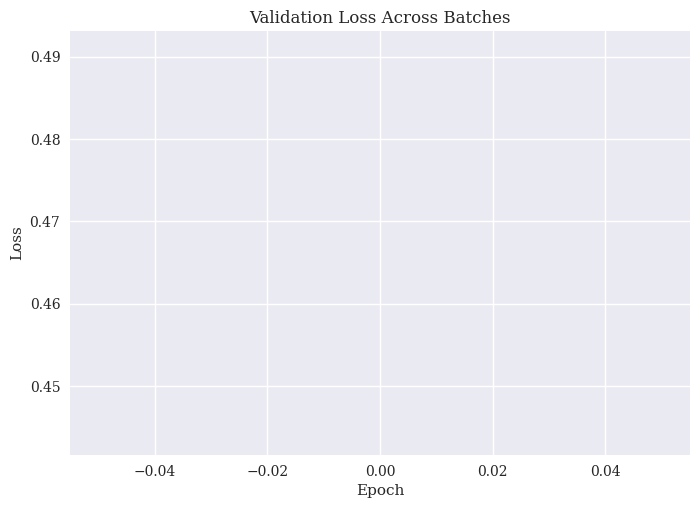

Epoch: 2
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001
Batch 400, Loss: 0.001
Batch 500, Loss: 0.001
Batch 600, Loss: 0.001

Val Loss: 0.222
***************************************************


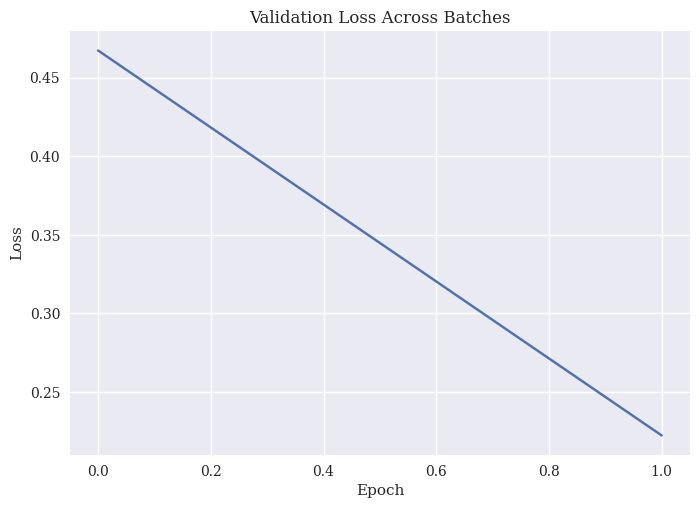

Epoch: 3
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.144
***************************************************


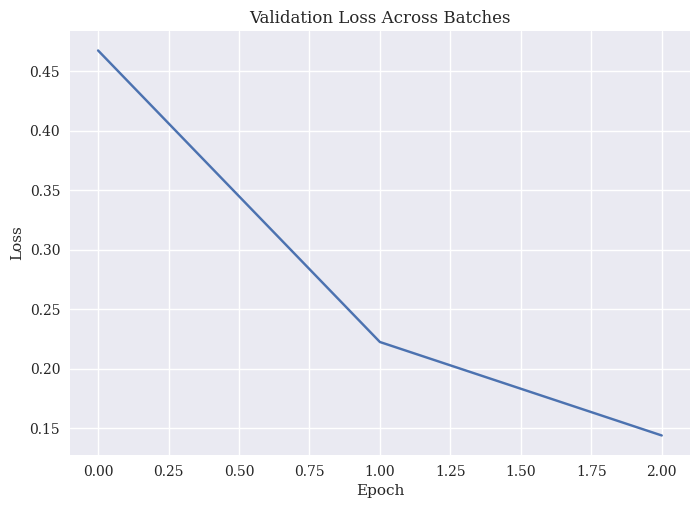

Epoch: 4
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.105
***************************************************


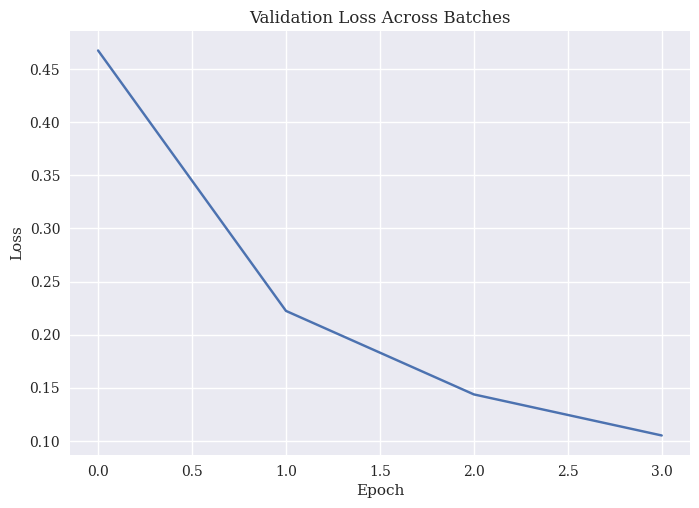

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.076
***************************************************


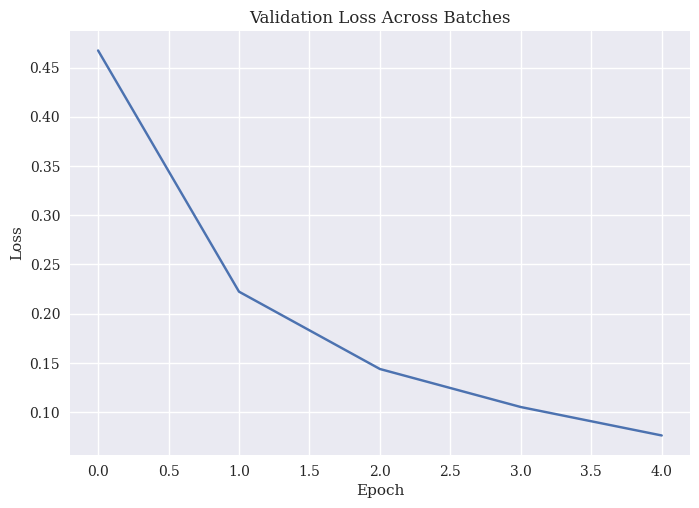

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.057
***************************************************


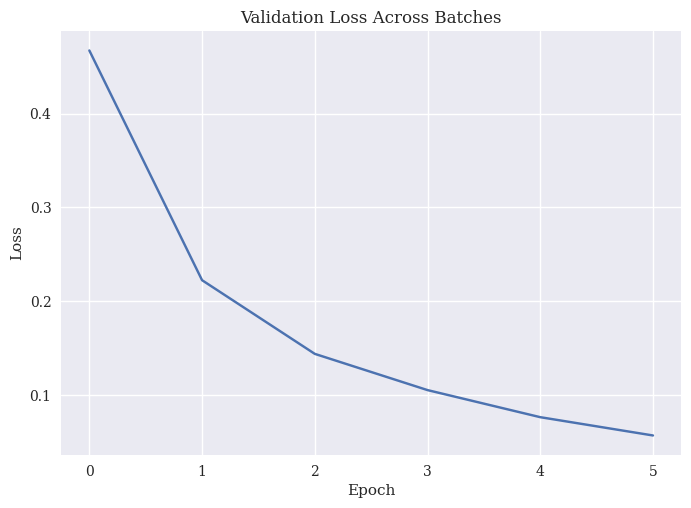

Epoch: 7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.045
***************************************************


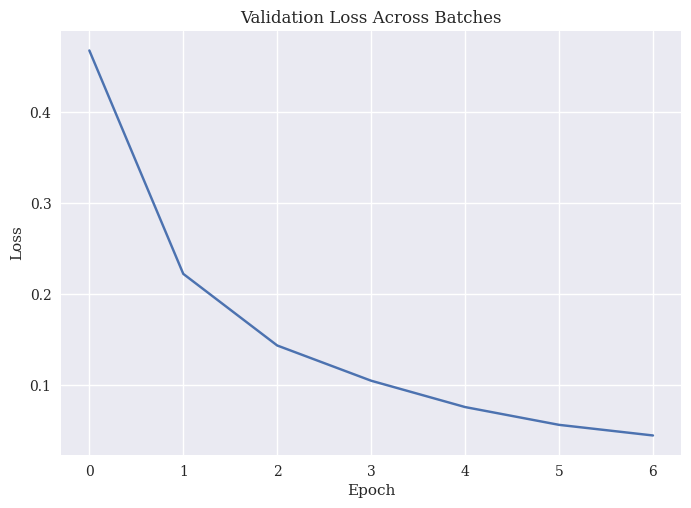

Epoch: 8
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.037
***************************************************


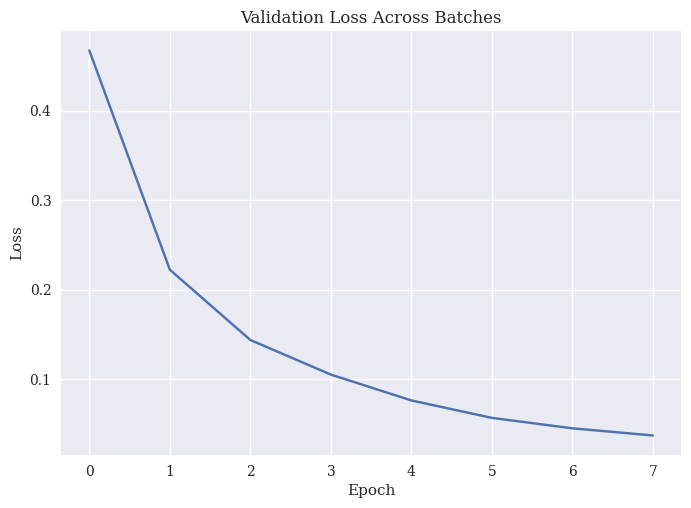

Epoch: 9
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.028
***************************************************


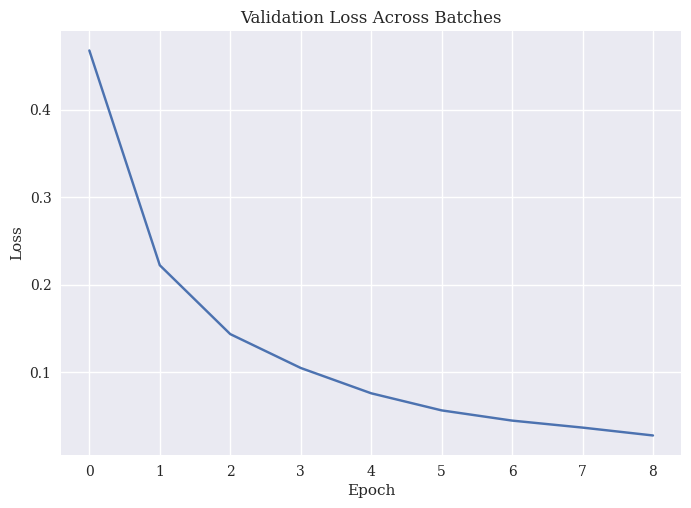

Epoch: 10
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.027
***************************************************


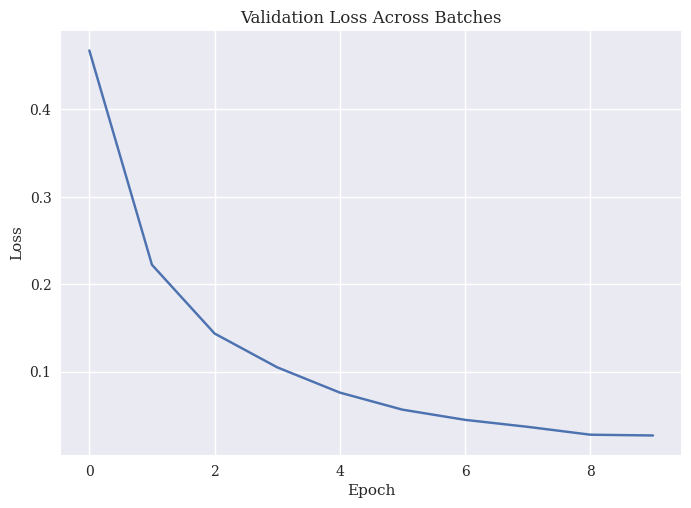

Epoch: 11
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.023
***************************************************


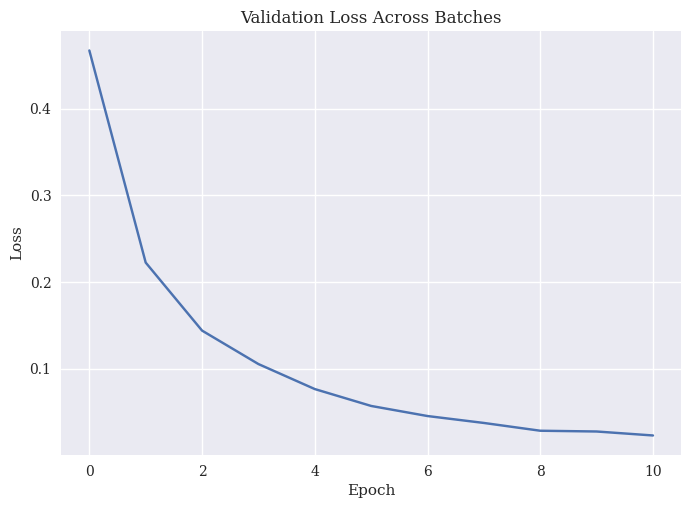

Epoch: 12
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.023
***************************************************


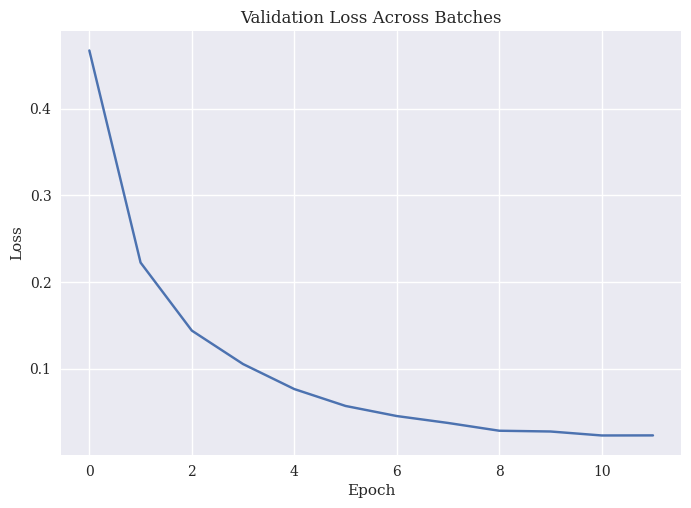

Epoch: 13
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.021
***************************************************


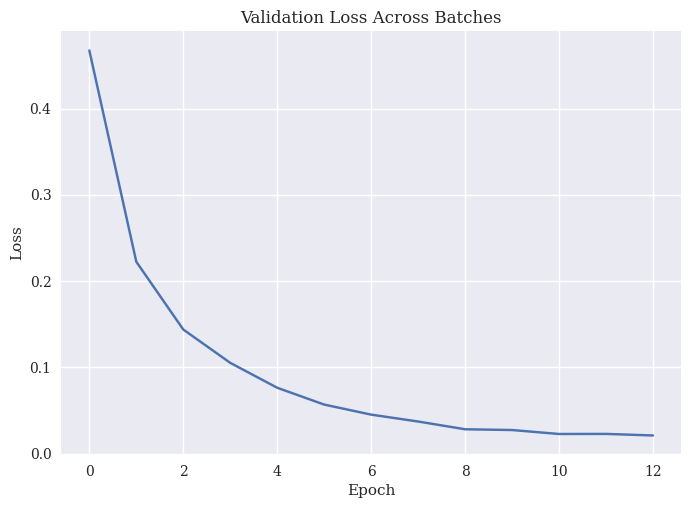

Epoch: 14
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.018
***************************************************


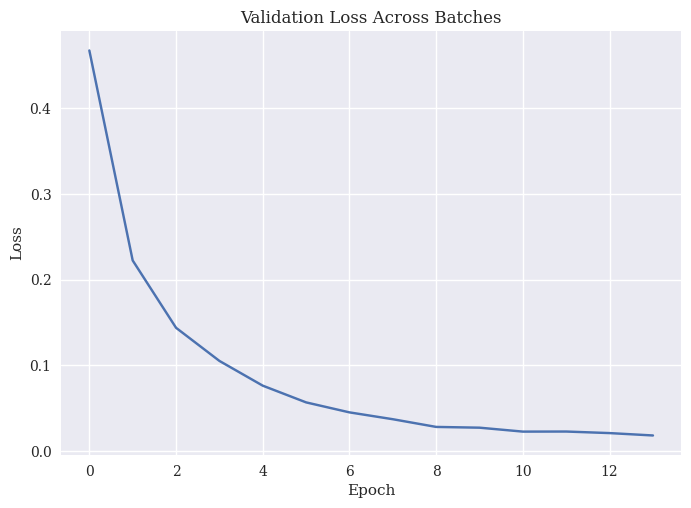

Epoch: 15
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.020
***************************************************


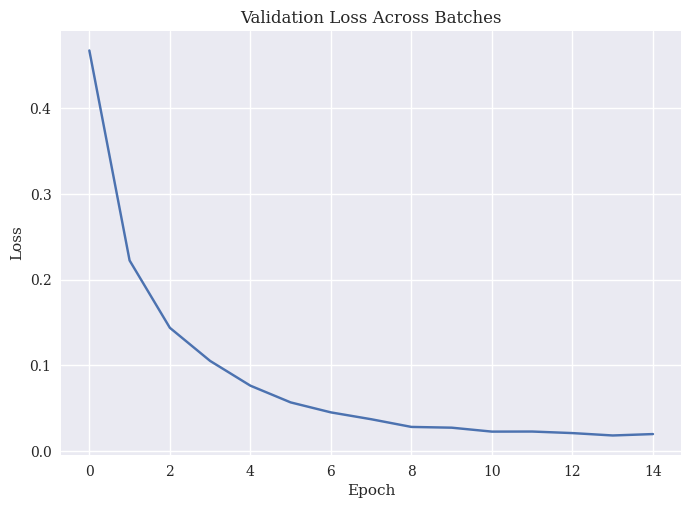

Epoch: 16
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.016
***************************************************


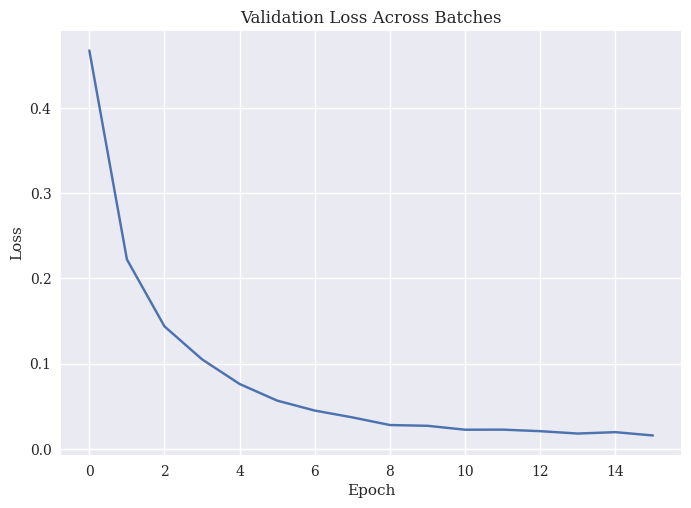

Epoch: 17
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.016
***************************************************


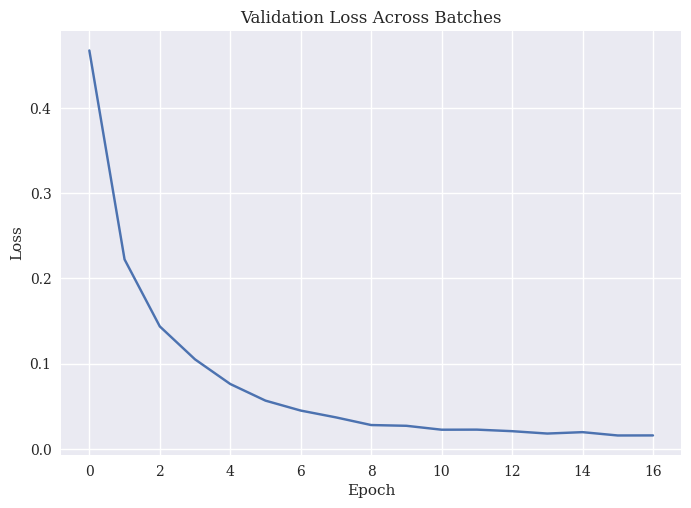

Epoch: 18
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.016
***************************************************


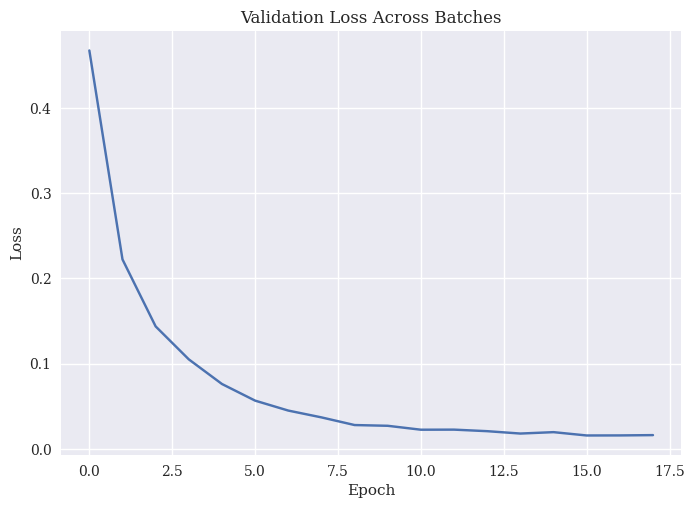

Epoch: 19
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.011
***************************************************


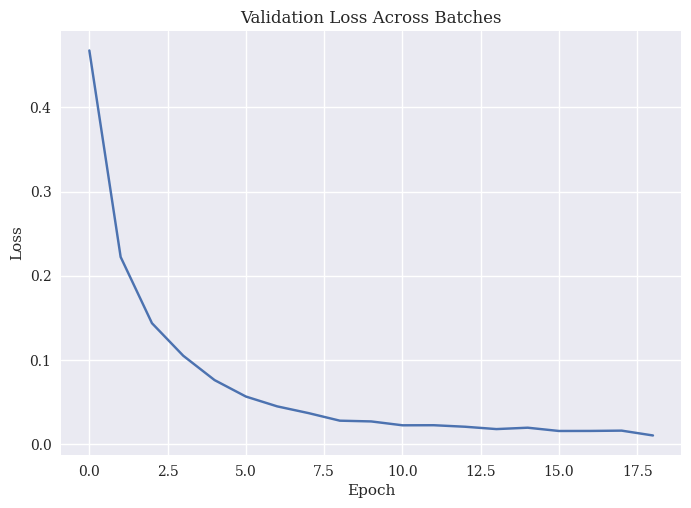

Epoch: 20
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.014
***************************************************


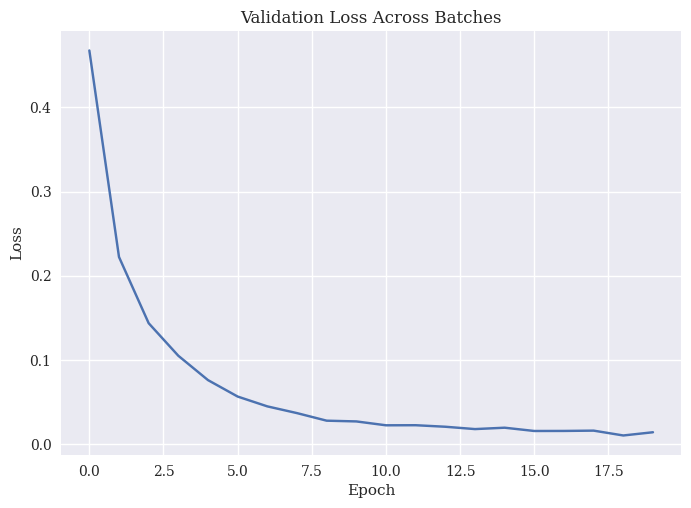

Epoch: 21
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.015
***************************************************


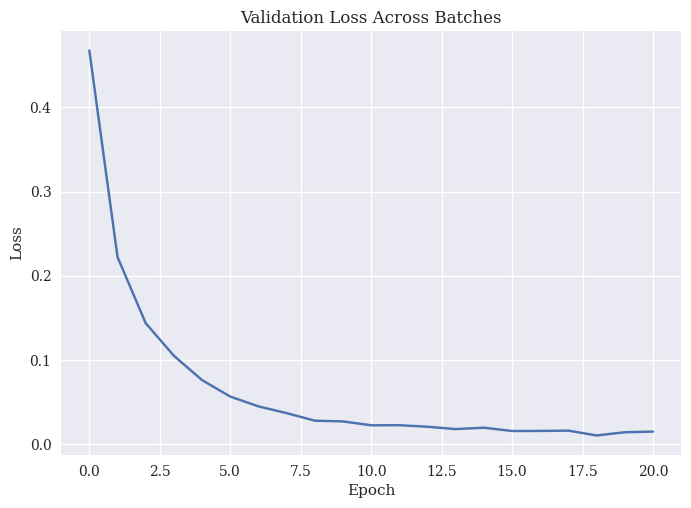

Epoch: 22
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.014
***************************************************


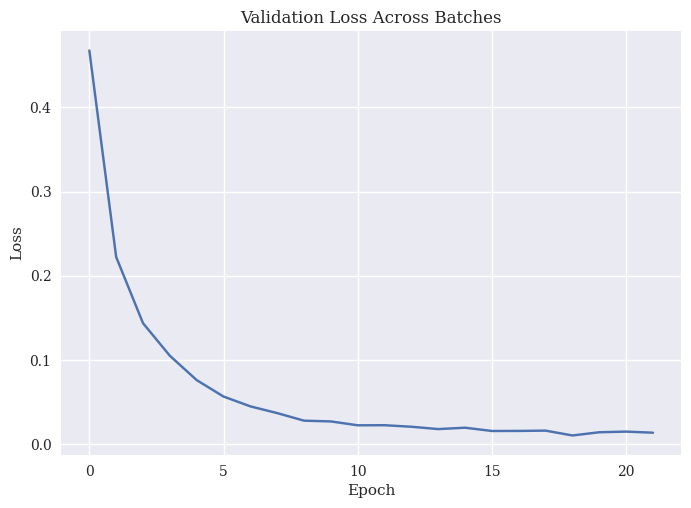

Epoch: 23
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.010
***************************************************


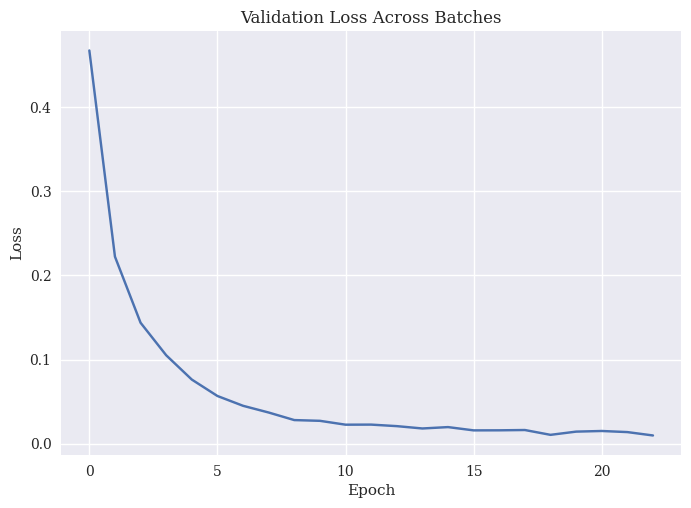

Epoch: 24
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.013
***************************************************


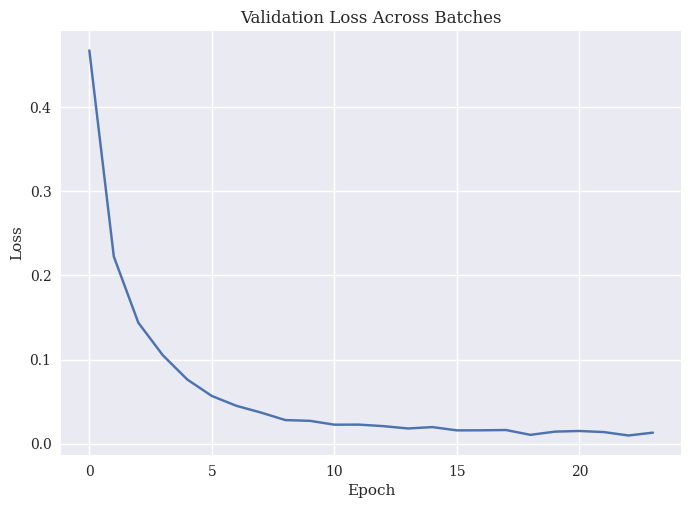

Epoch: 25
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.013
***************************************************


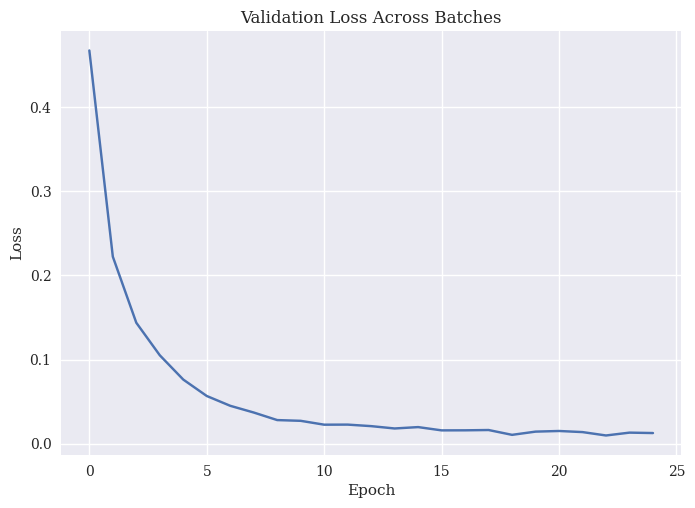

Epoch: 26
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.015
***************************************************


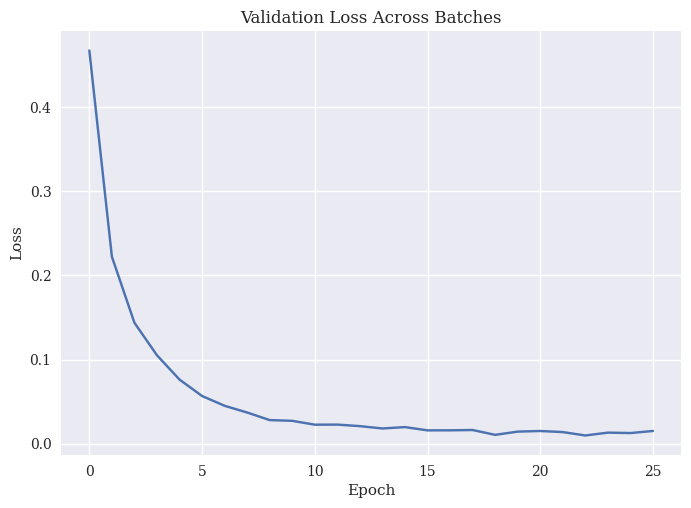

Epoch: 27
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.010
***************************************************


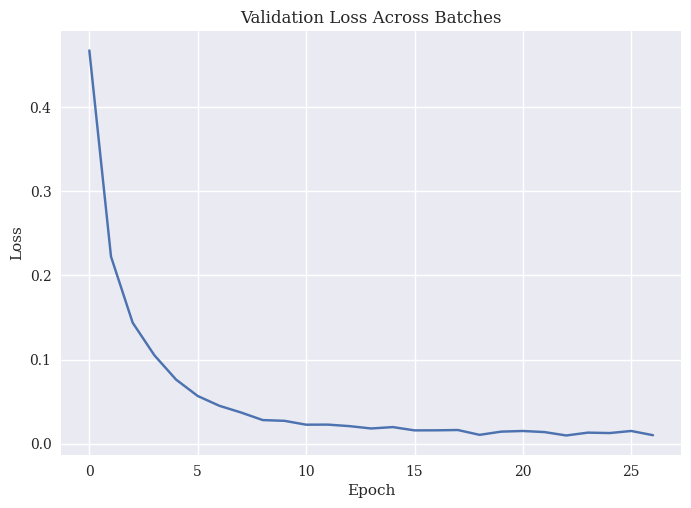

Epoch: 28
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.012
***************************************************


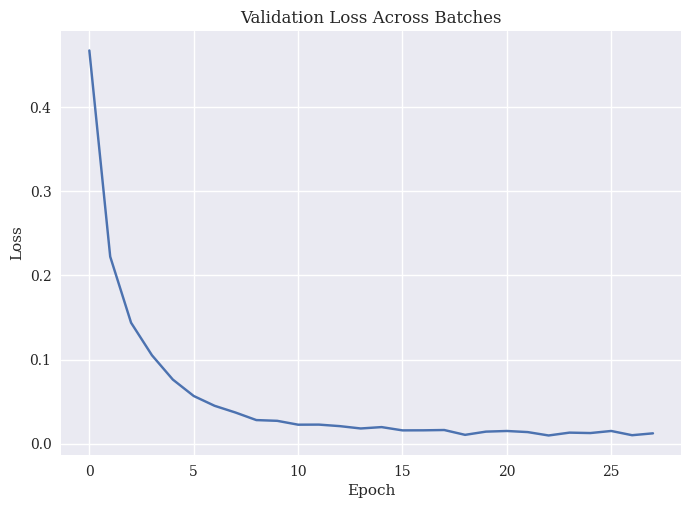

Epoch: 29
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.011
***************************************************


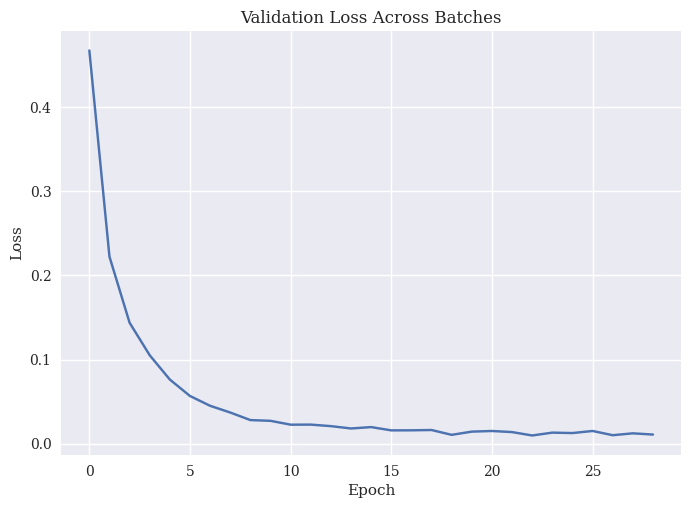

Epoch: 30
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.012
***************************************************


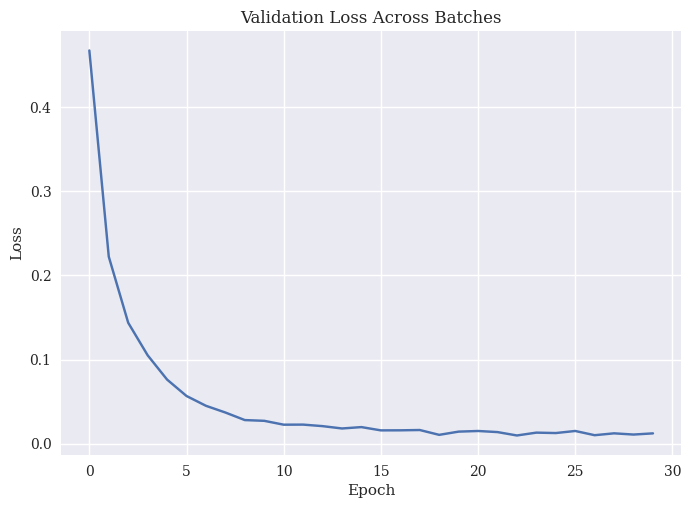

Epoch: 31
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.014
***************************************************


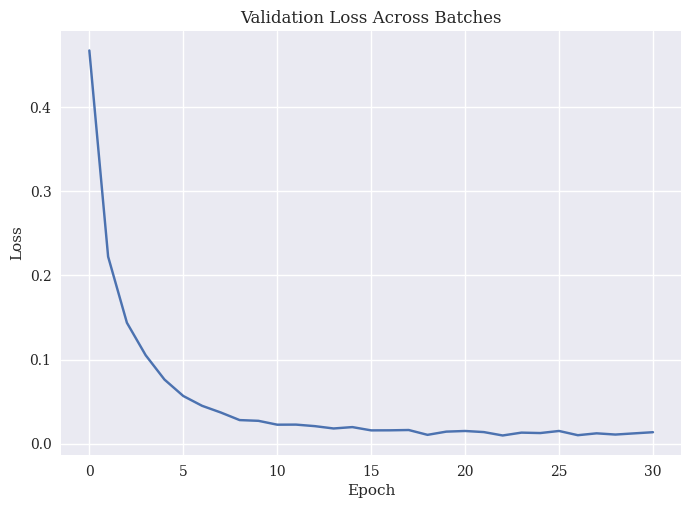

Epoch: 32
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.012
***************************************************


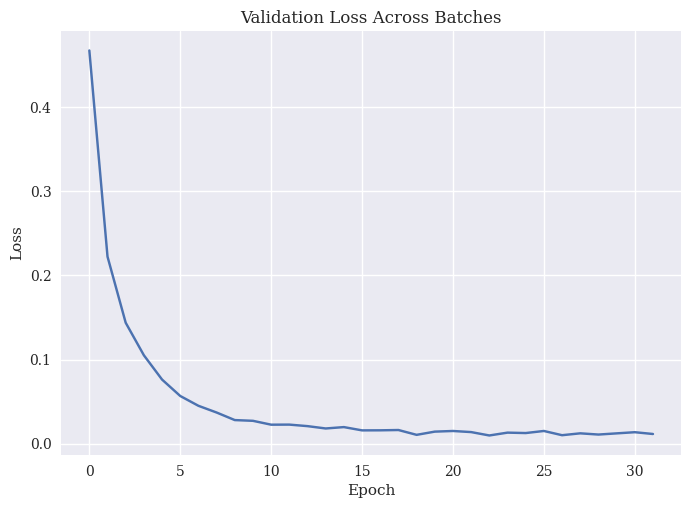

Epoch: 33
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.008
***************************************************


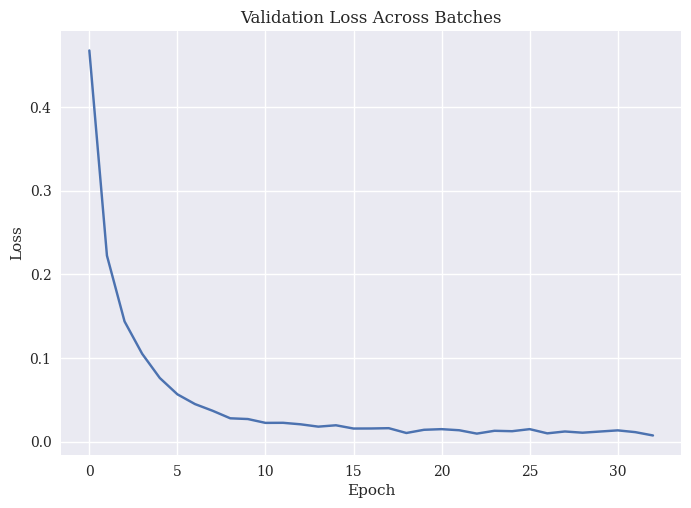

Epoch: 34
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.011
***************************************************


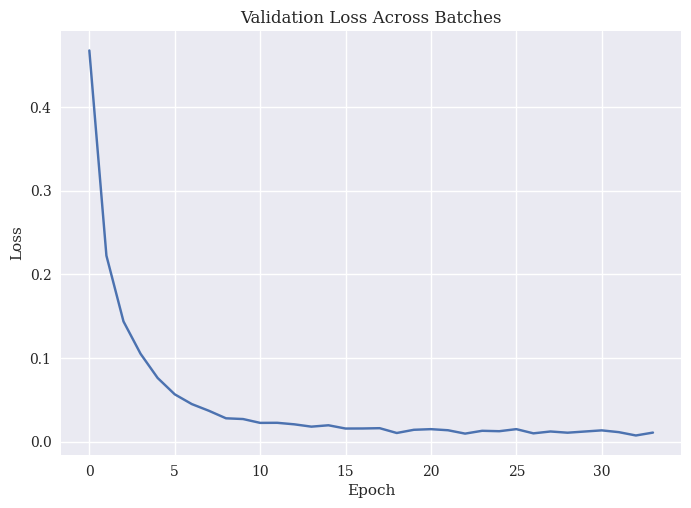

Epoch: 35
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.009
***************************************************


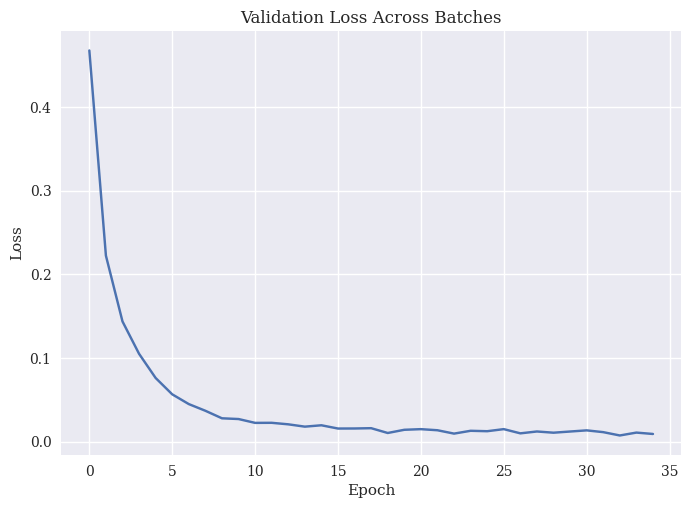

Epoch: 36
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.010
***************************************************


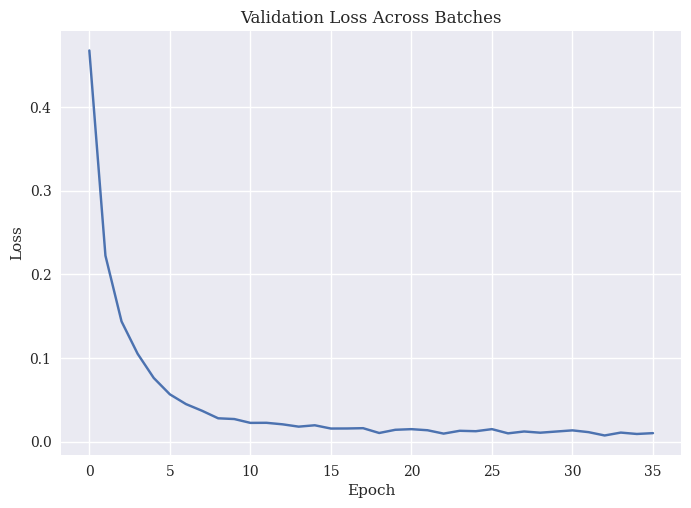

Epoch: 37
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.009
***************************************************


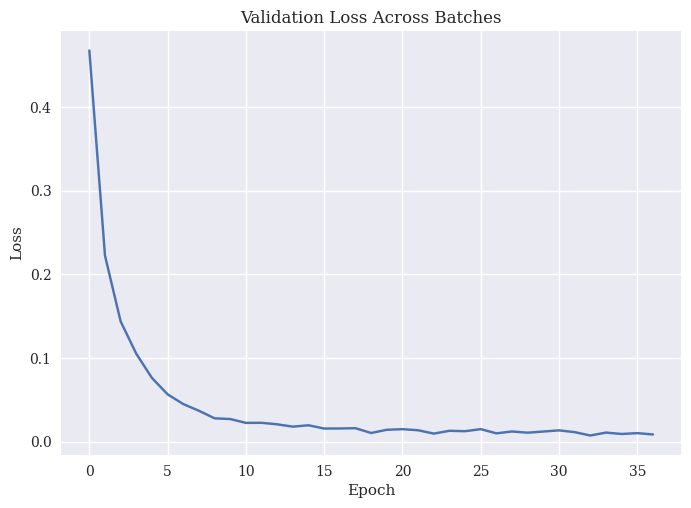

Epoch: 38
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.010
***************************************************


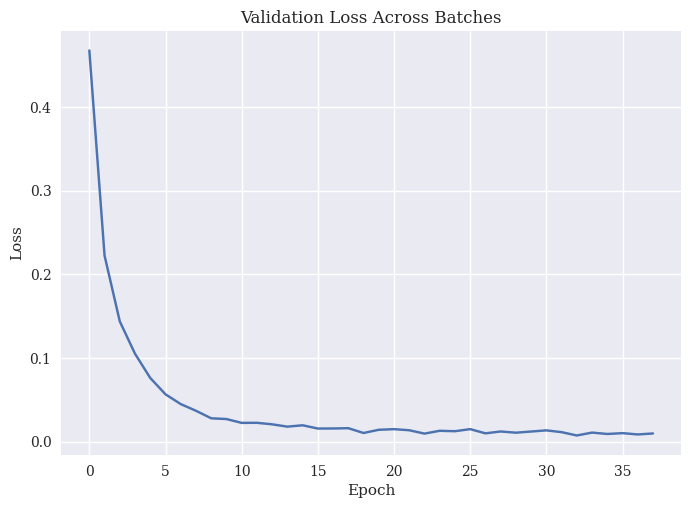

Epoch: 39
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.011
***************************************************


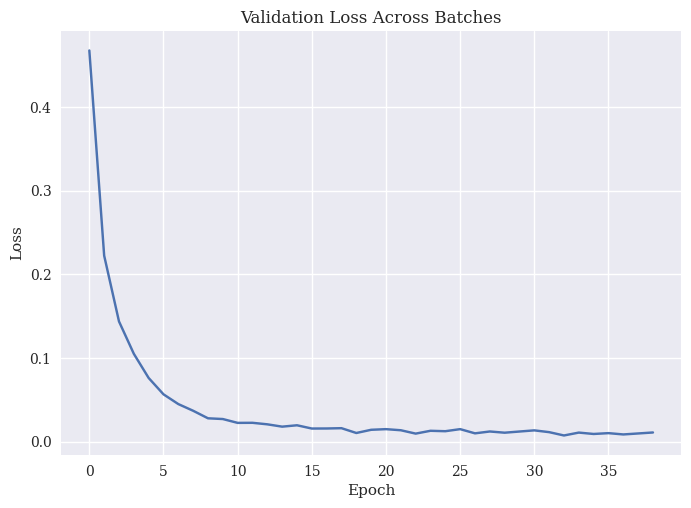

Epoch: 40
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.007
***************************************************


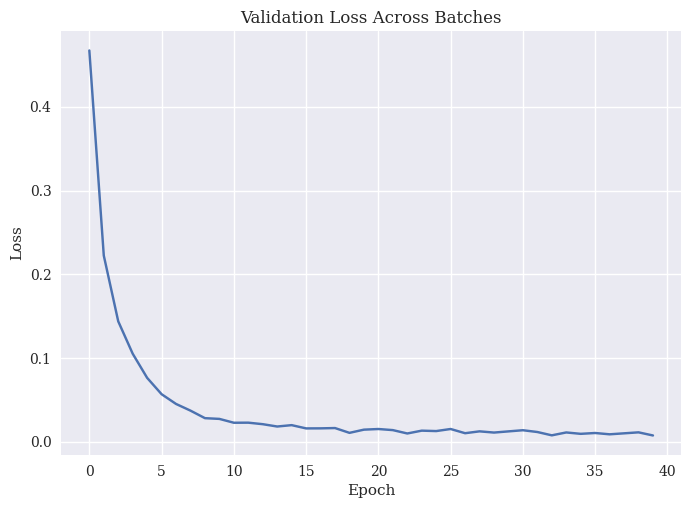

Epoch: 41
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.010
***************************************************


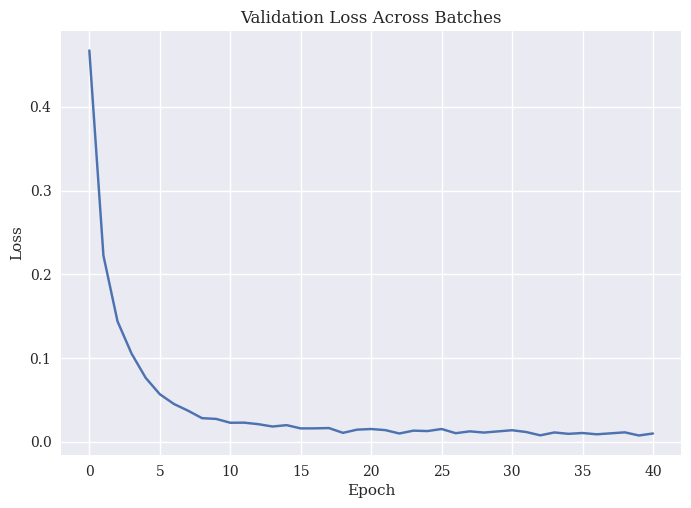

Epoch: 42
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.007
***************************************************


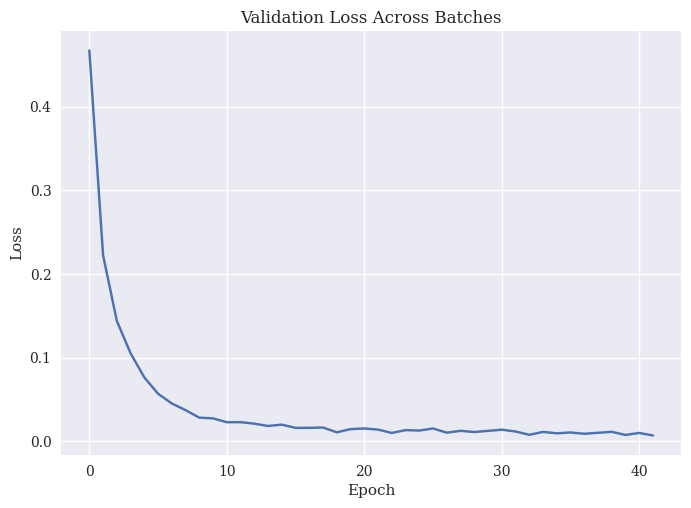

Epoch: 43
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.008
***************************************************


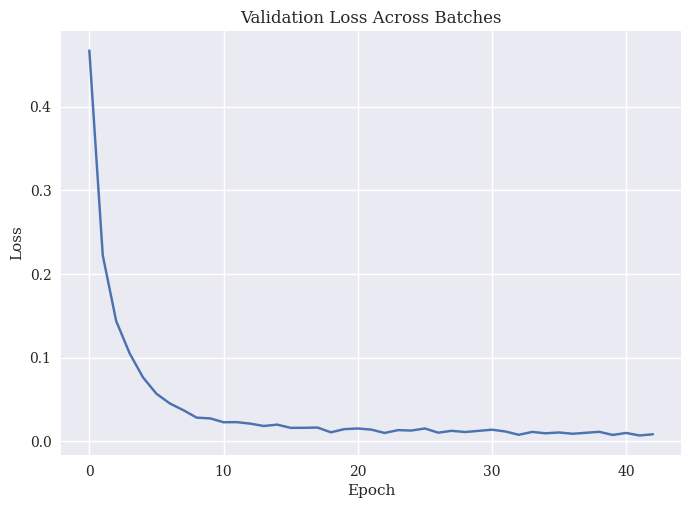

Epoch: 44
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.007
***************************************************


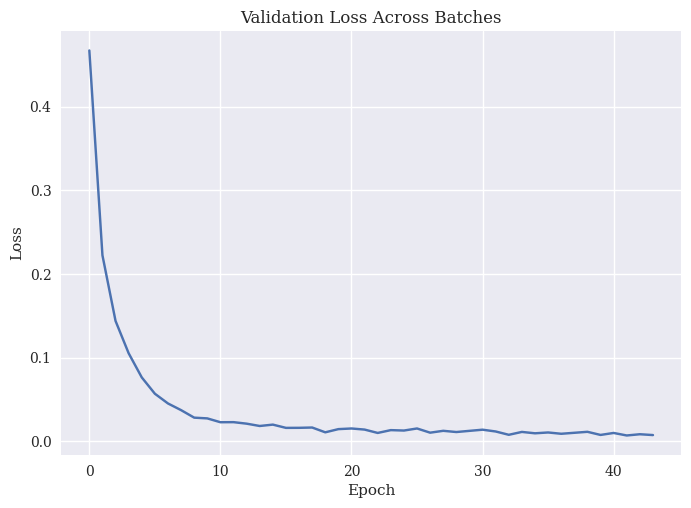

Epoch: 45
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.009
***************************************************


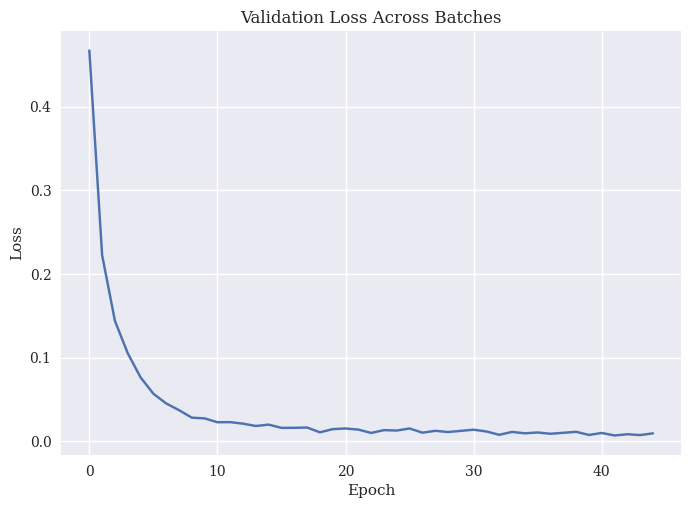

Epoch: 46
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.007
***************************************************


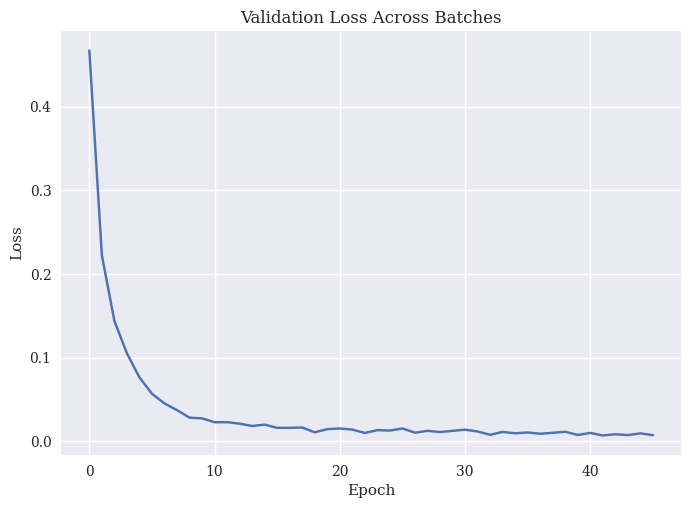

Epoch: 47
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.006
***************************************************


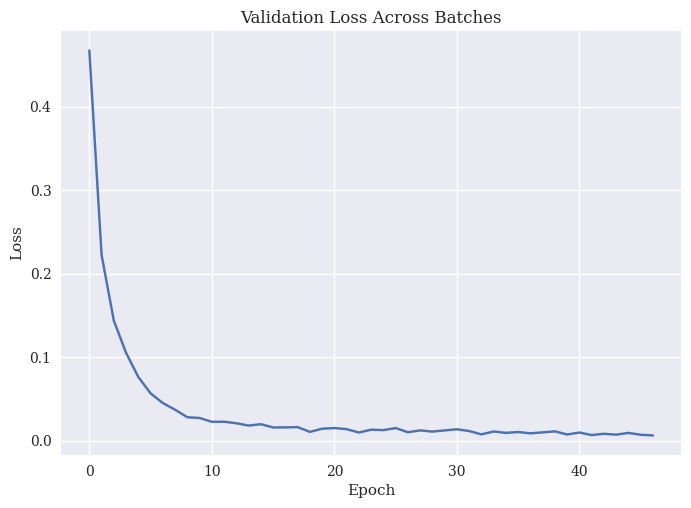

Epoch: 48
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.006
***************************************************


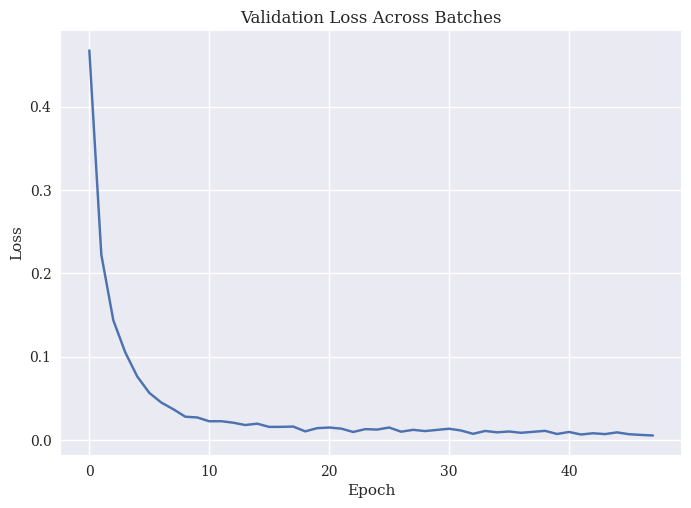

Epoch: 49
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.007
***************************************************


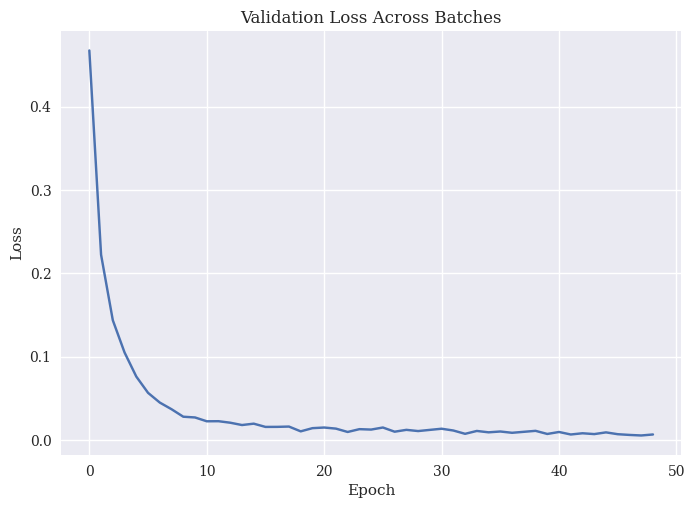

Epoch: 50
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000

Val Loss: 0.007
***************************************************


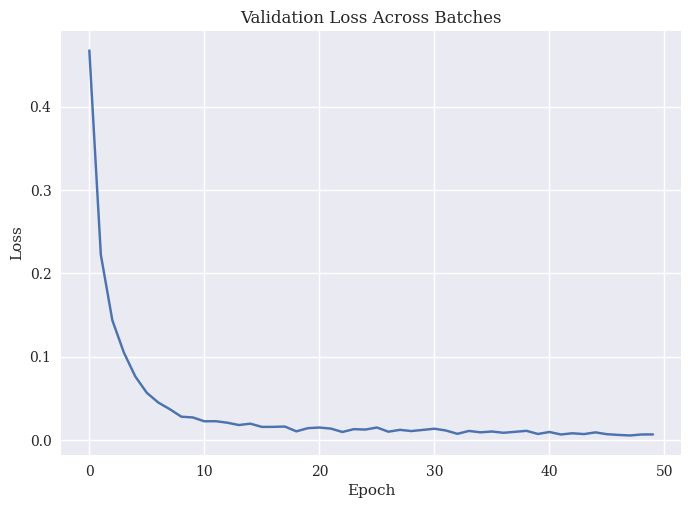

In [ ]:
learning_rate = 0.001
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

# The code you provided is for plotting the actual close prices (y_train) against the predicted close prices.

From the obseervation of the graph you can see that the model is quite doing well on the train day prediction.

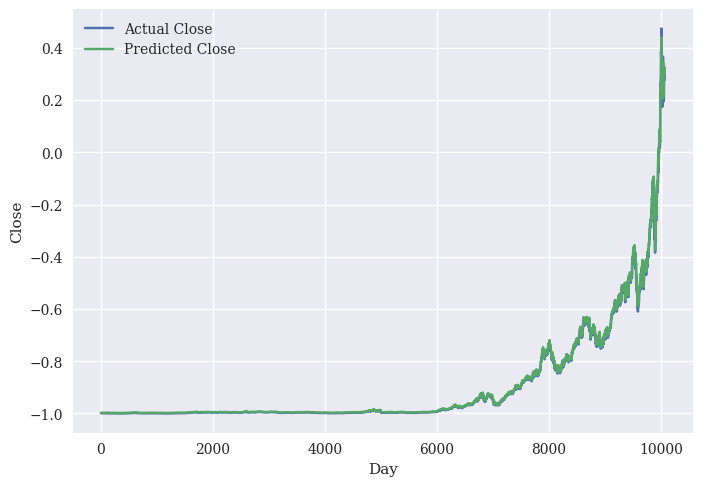

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# scaler.inverse_transform to convert the predicted values back to the original scale

In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.29980568,   0.30581963,   0.31275546, ..., 120.62273232,
       119.76274853, 119.52122533])

# Inverse transform the original y_train values.

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  0.13783579,   0.14509157,   0.1584806 , ..., 118.0299993 ,
       118.64000021, 117.33999768])

# The code you provided is for plotting the actual close prices (y_train) against the predicted close prices using the original scale

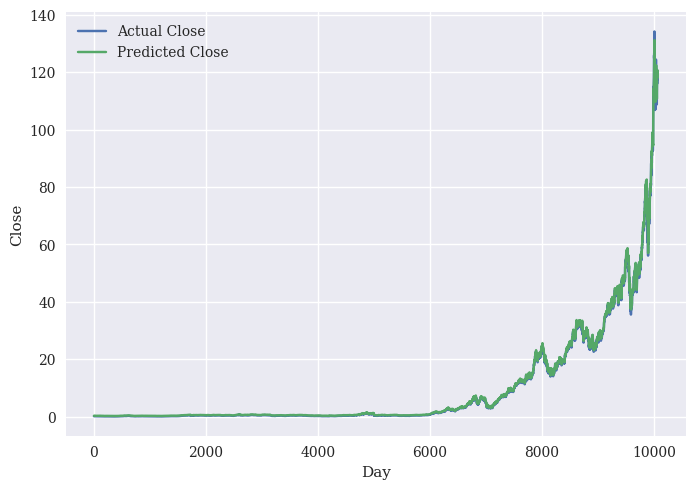

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# Similar to what we did for the train set we are also doing for the test set.

Generating predictions on the test set using the trained model and then transforming these predictions back to the original scale using the scaler

In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([118.81737645, 116.63626539, 116.10328531, 116.44541878,
       117.05478522, 118.6881823 , 121.42314601, 123.03243307,
       123.6215126 , 123.43853998, 123.89385391, 124.4068616 ,
       123.46273135, 123.56780463, 123.27898869, 122.80566003,
       125.38901151, 126.94762196, 128.1167574 , 127.72399614,
       128.03060447, 129.73839772, 130.33773188, 131.0528115 ,
       133.31331861, 133.89403068, 133.57296501, 132.85536376,
       131.03202569, 130.58088195, 128.55123129, 129.30570796,
       130.43096164, 129.82501702, 129.29260634, 129.85344364,
       129.39942578, 128.2716342 , 127.95229842, 129.68017793,
       132.73011745, 135.31976487, 138.07785707, 139.58622475,
       139.8485663 , 138.01846594, 134.73134692, 133.57637056,
       133.48391627, 133.22237188, 134.52322851, 135.14706856,
       135.47411565, 135.2258681 , 134.78880751, 134.40976607,
       134.2864503 , 133.40369052, 131.89278494, 130.53268359,
       129.87917509, 127.92477742, 126.75140673, 125.99

# Transforming the true values (ground truth) of the test set back to their original scale using the scaler

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([113.84999873, 115.16999805, 116.02999811, 116.58999757,
       119.05000345, 122.72000058, 123.08000237, 122.94000318,
       122.24999885, 123.74999907, 124.37999677, 121.77999983,
       123.23999834, 122.41000296, 121.77999983, 127.87999818,
       127.80999723, 128.69999652, 126.66000447, 128.22999479,
       131.88000598, 130.96000744, 131.970001  , 136.69000154,
       134.86999582, 133.72000035, 132.69000187, 129.41000306,
       131.00999533, 126.59999785, 130.9199976 , 132.0500017 ,
       128.9799949 , 128.80000214, 130.88999835, 128.9100048 ,
       127.14000053, 127.83000215, 132.02999949, 136.86999701,
       139.07000672, 142.91999661, 143.16000141, 142.05999656,
       137.08999689, 131.96000668, 134.14000063, 134.99000635,
       133.94000295, 137.39000019, 136.75999435, 136.91000142,
       136.00999424, 135.389999  , 135.13000554, 135.36999408,
       133.19000284, 130.8399969 , 129.71000636, 129.8699942 ,
       125.99999939, 125.8600002 , 125.34999948, 120.98

#  plotted the actual and predicted close prices for the test set.

The visualization allows me to compare how well the model's predictions align with the true values. From the the oberved plot we can see the model is doing well on the test data.

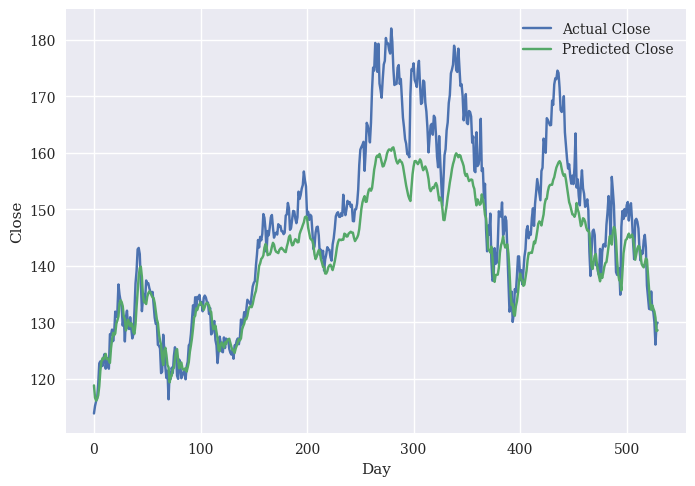

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# The R-squared score

R-squared score is measure how well the predicted values match the actual values, It  indicates a better fit of the model to the data. A score of 0.769 indicates that your model explains about 76.9% of the variance in the test set why other factor captures the rest e.g(News, government policy and others). This is a reasonably good R-squared score

In [ ]:
from sklearn.metrics import r2_score

# Assuming 'predictions' contains the model's predicted values for the test set
# Assuming 'y_test' contains the true target values for the test set

# Calculate R-squared score
r2 = r2_score(new_y_test, test_predictions)

print(f'R-squared Score: {r2}')


R-squared Score: 0.7691688435575154


# The adjusted R-squared (adj_r2)

Adjusted R-squared takes into account the number of predictors in the model, adjusting the R-squared value based on the complexity of the model. In your case, with one predictor (k=1), the adjusted R-squared is calculated to be approximately 0.768.

Similar to the R-squared score, the adjusted R-squared score is a measure of how well the model explains the variance in the test set. A higher adjusted R-squared suggests a better balance between explanatory power and model complexity.



In [ ]:
n = new_y_test.shape[0]
k = 1
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print(f'adj_r2 Score: {adj_r2}')

adj_r2 Score: 0.7687316633369803


# SUMMARY

#Data Preparation:

The historical stock price data is loaded and processed using pandas.
The data is transformed into a format suitable for training an LSTM model by creating lag features.

#Model Architecture:

An LSTM (Long Short-Term Memory) neural network model is defined using PyTorch.
The model architecture includes an LSTM layer with specified input size, hidden size, and the number of stacked layers, followed by a fully connected layer (linear layer).

#Data Normalization:

The data is normalized using Min-Max scaling, a common practice in neural network-based models.

#Data Splitting:

The data is split into training and testing sets for model training and evaluation.

#PyTorch Data Loaders:

PyTorch DataLoader objects are created for efficiently loading batches of training and testing data.

#Model Training:

The model is trained using the training dataset, and training loss is monitored during each epoch.
The Adam optimizer and Mean Squared Error (MSE) loss function are used for training.

#Model Validation:

After training, the model is evaluated on the validation dataset, and the validation loss is calculated.
The validation loss is used to assess how well the model generalizes to new, unseen data.

#Model Prediction and Visualization:

The trained model is used to make predictions on both the training and testing datasets.
The predictions are inverse-transformed to the original scale for visualization.
Visualizations, including plots of actual vs. predicted stock prices, are generated.

#Evaluation Metrics:

R-squared and adjusted R-squared scores are computed to quantify the goodness of fit of the model.
These metrics provide an indication of how well the predicted values match the actual values.

#Training Progress and Results:

The training progress is displayed, showing the loss for each batch during training epochs.
After the final epoch, the validation loss is presented.

#Summary:

The model appears to perform well, with low training and validation losses.
Visualizations help in assessing the model's predictions.
Evaluation metrics provide quantitative measures of the model's performance.
Keep in mind that the success of the model depends on other various factors, and further analysis may be needed to ensure robustness and reliability. Additionally, real-world financial data can be challenging, and other considerations like risk management and business context are crucial in practical applications.





